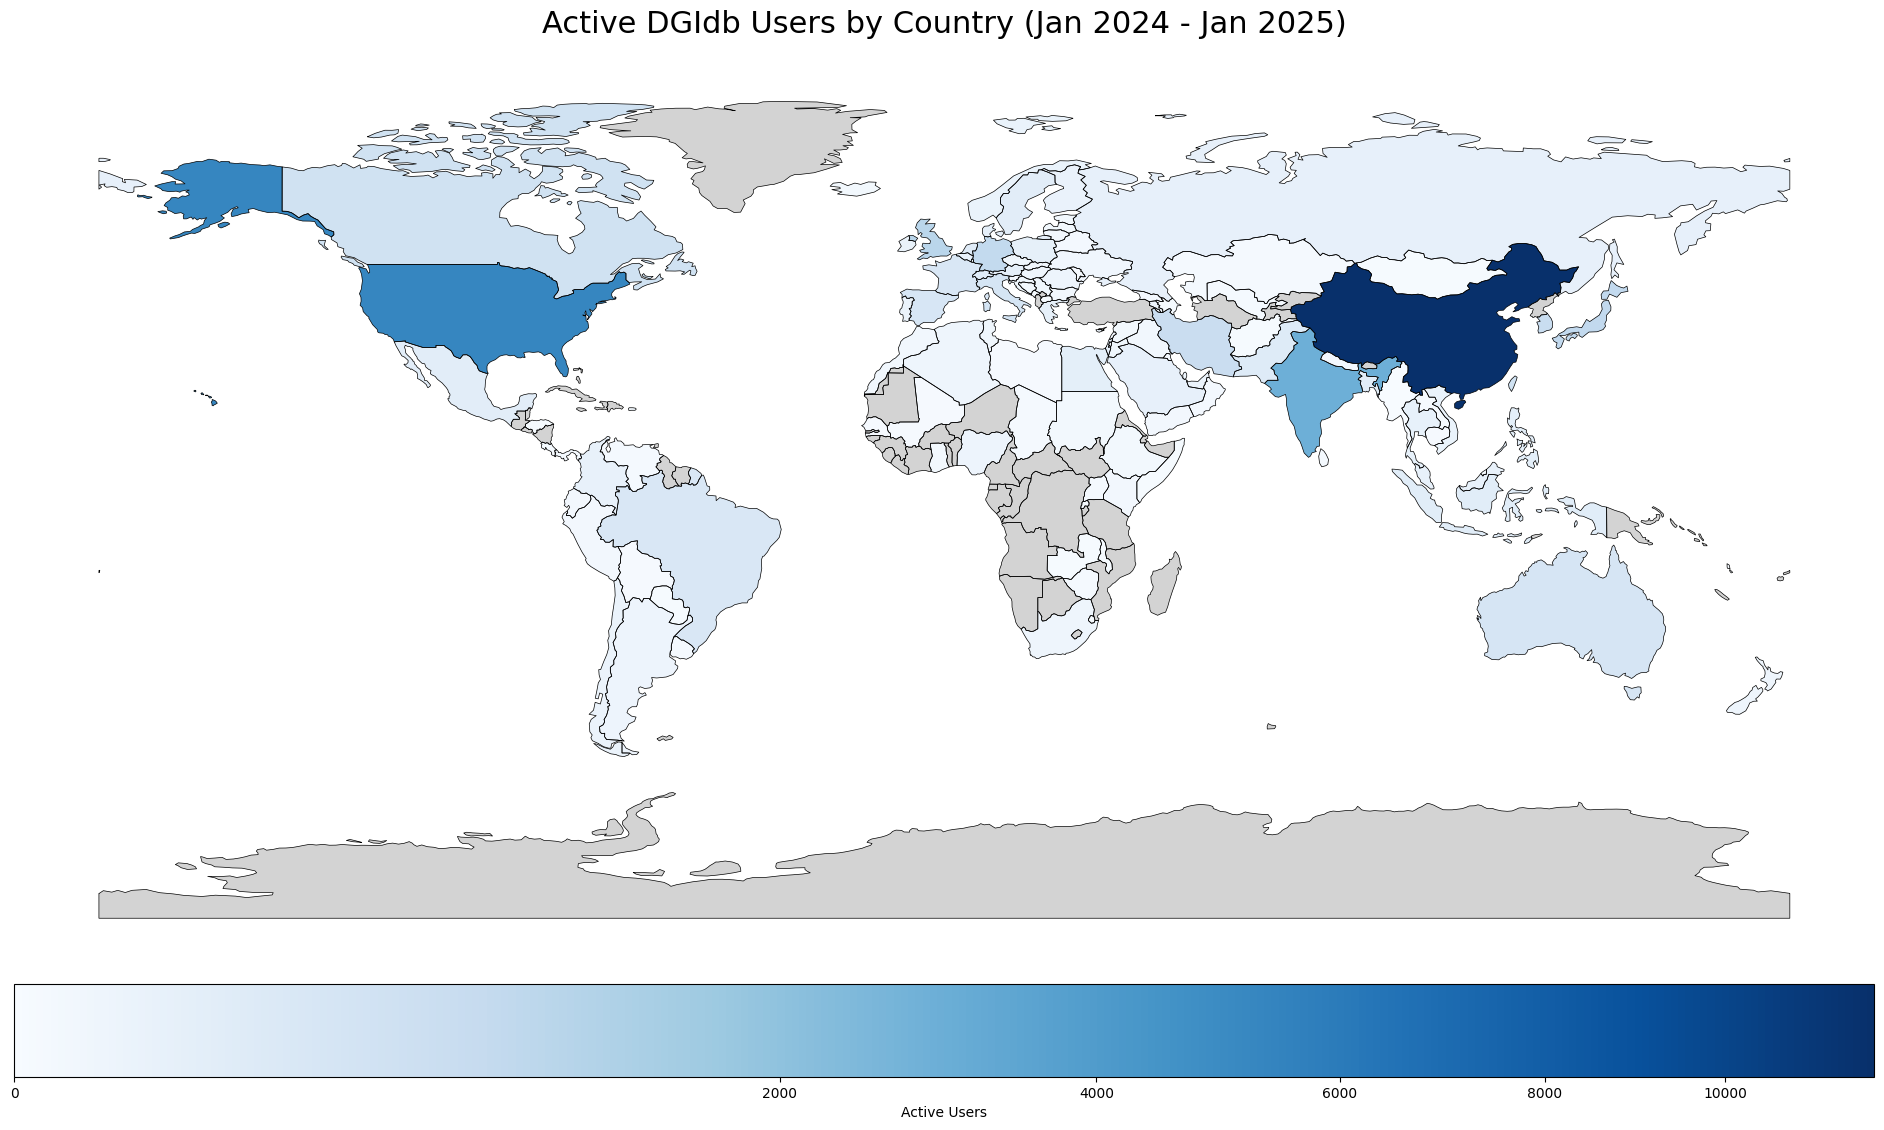

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, PowerNorm

# Load data
file_path = "data-export.csv"  
df = pd.read_csv(file_path, skiprows=9)

# Drop rows where 'Country' is '(not set)'
df = df[df['Country'] != '(not set)']

# Updated country mapping to match the dataset to shapefile
country_mapping = {
    "United States": "United States of America",
    "Turkey": "Türkiye",
    "Congo (Kinshasa)": "Dem. Rep. Congo",
    "Congo (Brazzaville)": "Congo",
    "Western Sahara": "W. Sahara",
    "Bahamas, The": "Bahamas",
    "Falkland Islands (Islas Malvinas)": "Falkland Is.",
    "French Southern and Antarctic Lands": "Fr. S. Antarctic Lands",
    "Ivory Coast": "Côte d'Ivoire",
    "Equatorial Guinea": "Eq. Guinea",
    "Eswatini": "eSwatini",
    "Myanmar (Burma)": "Myanmar",
    "Democratic People's Republic of Korea": "North Korea",
    "Bosnia & Herzegovina": "Bosnia and Herz.",
    "South Sudan": "S. Sudan",
    "Solomon Islands": "Solomon Is.",
    "Northern Cyprus": "N. Cyprus",
    "Trinidad and Tobago": "Trinidad and Tobago",
    "Timor-Leste": "Timor-Leste",
    "Gambia, The": "Gambia",
    "Saint Kitts & Nevis": "St. Kitts and Nevis",
    "Saint Lucia": "St. Lucia",
    "Saint Vincent and the Grenadines": "St. Vincent and the Grenadines"
}
df['Country'] = df['Country'].replace(country_mapping)

# Load shapefile
shapefile_path = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

# Apply maps
world = world.rename(columns={"NAME": "Country"})
geo_data = world.merge(df, on="Country", how="left")

# Use PowerNorm to stretch middle values for better distinction
norm = PowerNorm(gamma=0.5)  # Adjust gamma for finer control (lower = more middle-range emphasis)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(24, 16))
geo_data.boundary.plot(ax=ax, linewidth=0.5, color="black")  # Add borders for better distinction
geo_data.plot(
    column="Active users",  # Metric to plot
    cmap="Blues",  # Monochromatic color palette
    norm=norm,  # Apply PowerNorm to enhance middle-value separation
    legend=True,
    legend_kwds={
        "label": "Active Users",  # Label for the legend
        "orientation": "horizontal",
        "shrink": 0.8,
        "pad": 0.02  # Reduce padding around the legend
    },
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

# Adjust title and layout
plt.title(
    "Active DGIdb Users by Country (Jan 2024 - Jan 2025)",
    fontsize=22,
    pad=20  # Move the title further from the map
)
plt.axis("off")  # Turn off axis

# Save the map to a file
output_file = "styled_geo_heatmap_monochromatic.svg"
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()